In [1]:
import os
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import pretrained_networks
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [2]:
tflib.init_tf()

In [5]:
network = '/data/ugr/yoder/networks/stylegan2_256x256_balanced.pkl'

In [6]:
_G, _D, Gs = pretrained_networks.load_networks(network)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [7]:
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 1

In [8]:
def make_latents(Gs, seed=0, sigma = 1.0, mu = 0.0):
    # note: this makes the z latent
    latents =  sigma * np.random.RandomState(seed).randn(1, Gs.input_shape[1]) + mu
    return latents

In [9]:
images = Gs.run(make_latents(Gs), None, **Gs_syn_kwargs) # [seed, y, x, rgb]

In [10]:
def plot_image(Gs_output):
    image = PIL.Image.fromarray(Gs_output[0], 'RGB')
    plt.imshow(image)

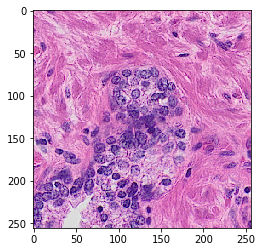

In [11]:
plot_image(images)

In [12]:
# load means
import pickle as pkl
data = None
means_pkl = '/data/ugr/yoder/paper2/w_mean_dict.pkl'
with open(means_pkl, "rb") as f:
    data = pkl.load(f)
print(data)

{'G4FG': array([[[ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        ...,
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011]]], dtype=float32), 'Healthy': array([[[ 0.06075083, -0.03578991,  0.5443307 , ..., -0.06433798,
         -0.10113731, -0.07815652],
        [ 0.06075083, -0.03578991,  0.5443307 , ..., -0.06433798,
         -0.10113731, -0.07815652],
        [ 0.06075083, -0.03578991,  0.5443307 , ..., -0.06433798,
         -0.10113731, -0.07815652],
        ...,
        [ 0.060750

In [13]:
def generate_image_from_w(Gs, w_code, seed=123):
    if seed is not None:
        noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
        rnd = np.random.RandomState(seed)
        tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
    all_images = Gs.components.synthesis.run(w_code, **Gs_syn_kwargs)
    return all_images

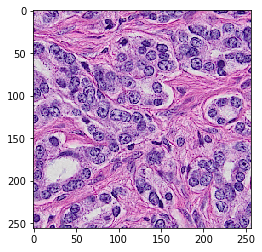

In [14]:
plot_image(generate_image_from_w(Gs, data['G4FG']))

In [2]:
def generate_intermediary_ws(v1, v2):
    
    pass